# Exploratory Data Analysis

In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. I will also analyze the relationship between the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable.

In [1]:
# Importing modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

In [2]:
# Load original data
df_raw = pd.read_csv("../data/cars.csv")

# Load preprocessed data
df_preprocessed = pd.read_csv("../data/preprocessed_data.csv")

# Load cleaned data (after outlier removal)
df_cleaned = pd.read_csv("../data/cleaned_data.csv")

# Display the first few rows
df_cleaned.head()

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,5500,2008,2,162000.0,1,1500.0,3,1,1,2
1,5350,2009,2,120000.0,1,1300.0,0,1,1,2
2,7000,2009,2,61000.0,1,1500.0,10,0,1,2
3,3300,2003,2,265000.0,0,1400.0,11,1,1,2
4,5200,2008,2,97183.0,0,1400.0,4,1,1,2


## Car Make Segment

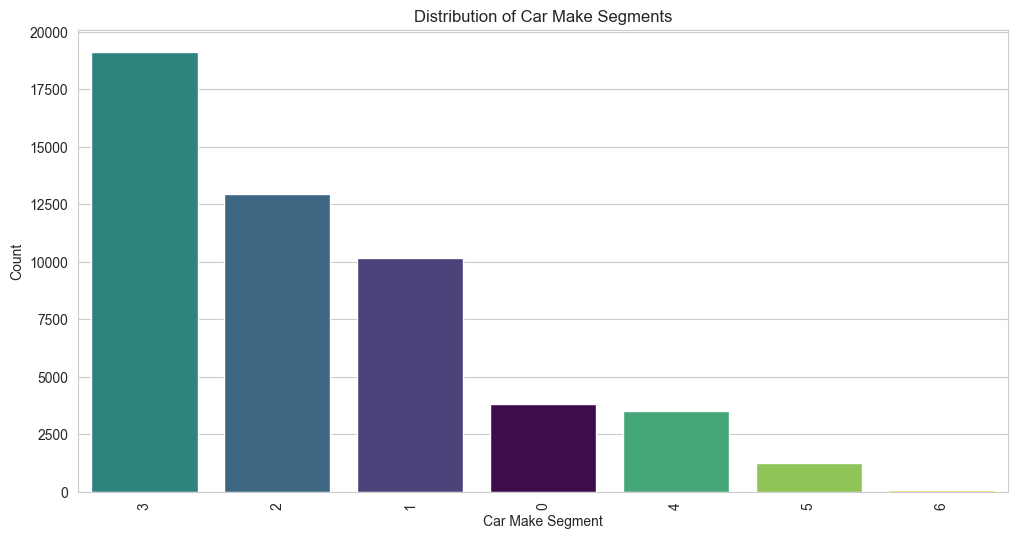

In [3]:
plt.figure(figsize=(12, 6))

# Compute value counts and reset index
make_counts = df_cleaned['make_segment'].value_counts().reset_index()
make_counts.columns = ['make_segment', 'count']

# Use barplot with hue for color mapping
sns.barplot(x='make_segment', y='count', data=make_counts, order=make_counts['make_segment'], hue='make_segment', palette="viridis", legend=False)

# Replace numeric labels with car names
plt.xticks(ticks=range(len(make_counts)), labels=make_counts['make_segment'], rotation=90)

plt.title("Distribution of Car Make Segments")
plt.xlabel("Car Make Segment")
plt.ylabel("Count")

plt.show()

### Here  car make segment are defined as 
0. Amercian
1. Russian/Eastern European
2. Mainstream European
3. Luxury European
4. Other
5. Specialty
6. Asian

In the dataset, most of the cars are european (particulary majority of the are Luxury followed by Mainstream and Russian/Eastern European). However the dataset also has american as well asian cars. There are also some speciality cars such as Tesla, McLaren, Bentley, etc. The dataset also has some cars that are not categorized into any of the above categories.

## Categorical Variable Distribution

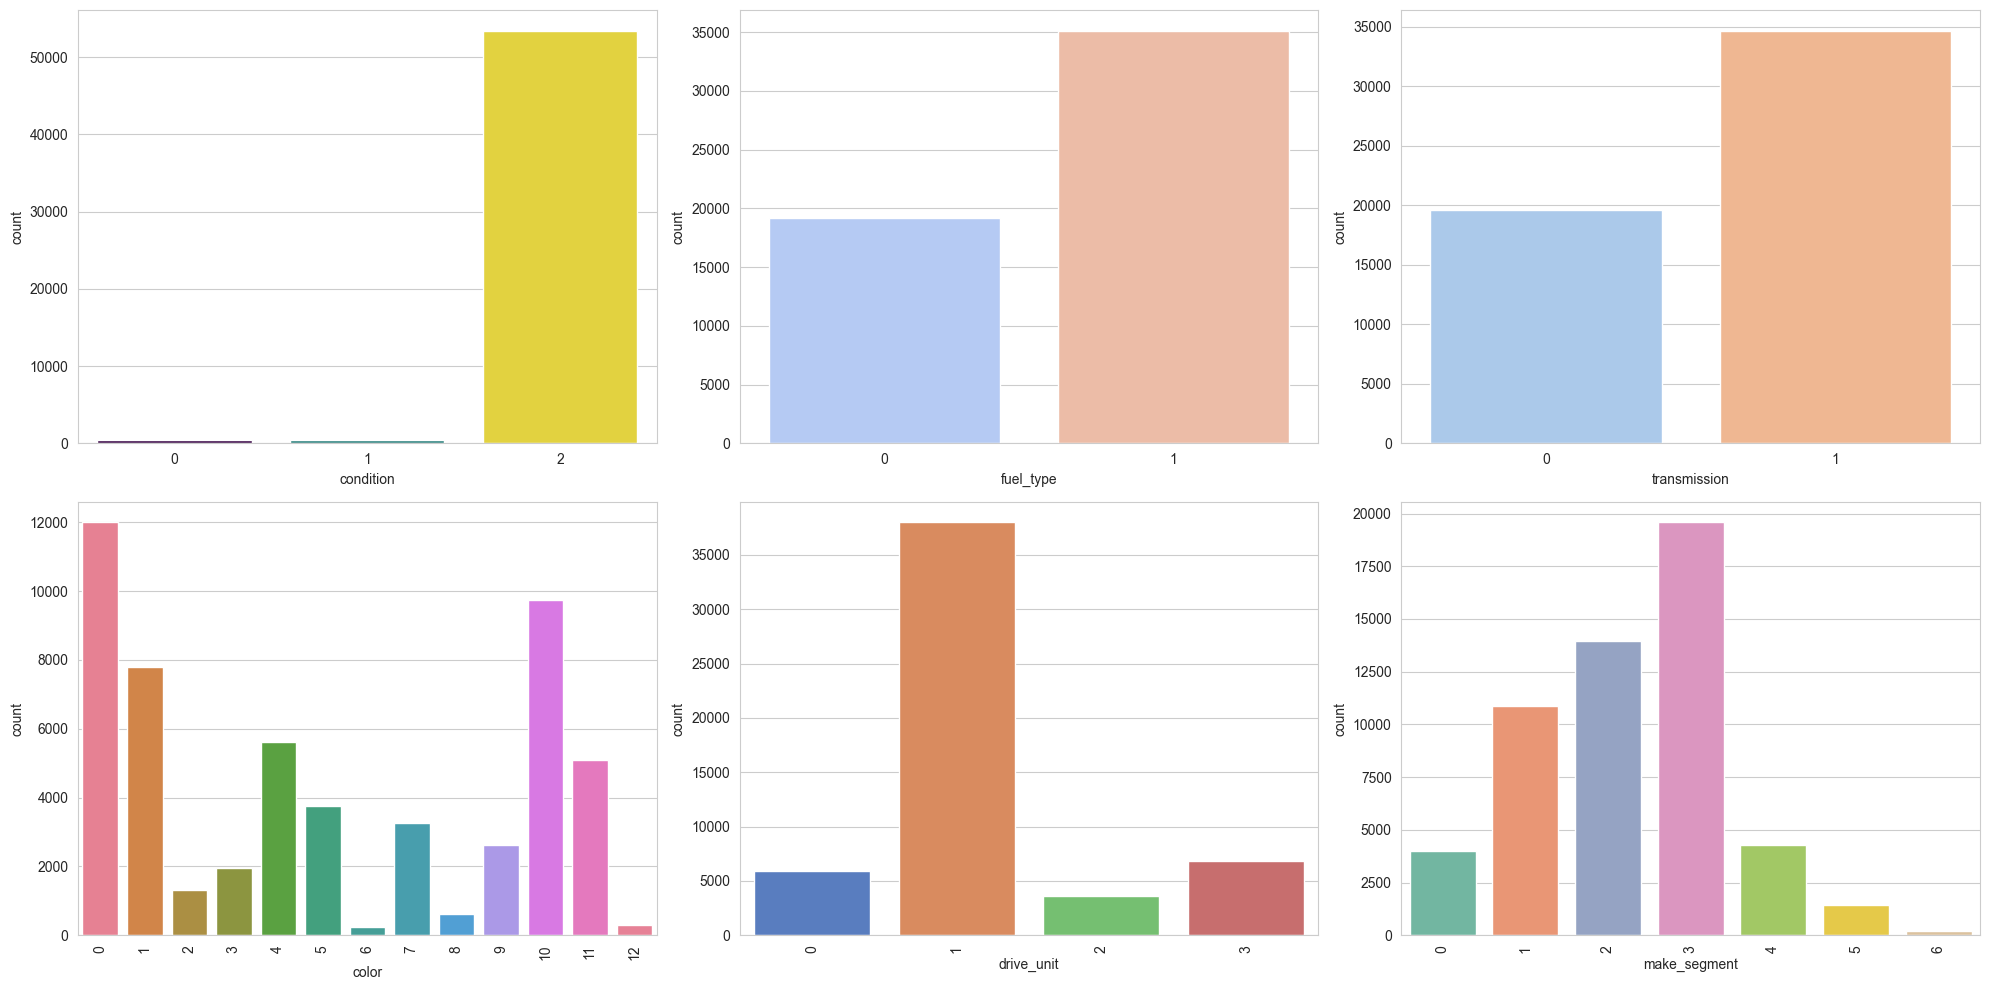

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(x='condition', hue='condition', data=df_preprocessed, ax=ax[0, 0], palette='viridis', legend=False)
sns.countplot(x='fuel_type', hue='fuel_type', data=df_preprocessed, ax=ax[0, 1], palette='coolwarm', legend=False)
sns.countplot(x='transmission', hue='transmission', data=df_preprocessed, ax=ax[0, 2], palette='pastel', legend=False)
sns.countplot(x='color', hue='color', data=df_preprocessed, ax=ax[1, 0], palette='husl', legend=False)
ax[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='drive_unit', hue='drive_unit', data=df_preprocessed, ax=ax[1, 1], palette='muted', legend=False)
ax[1, 1].tick_params(axis='x', rotation=90)

sns.countplot(x='make_segment', hue='make_segment', data=df_preprocessed, ax=ax[1, 2], palette='Set2', legend=False)
ax[1, 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Analysis of Categorical Variables in the Dataset

#### Car Condition:
- The majority of cars sold are in **working condition (Category 2)**.
- Very few cars are in **average (Category 1) or poor condition (Category 0)**.

#### Fuel Type:
- Most cars run on **petrol (Category 1)**.
- **Diesel (Category 0)** is the second most common fuel type.
- Hardly any cars run on **electricity or other alternative fuel sources**.

#### Transmission Type:
- The dataset shows that **manual transmission (Category 1)** is more common than **automatic transmission (Category 0)**.

#### Drive Unit:
- **Front-wheel drive (Category 1)** is the most common drivetrain.
- Other drivetrain types, such as:
  - **Rear-wheel drive (Category 0)**
  - **All-wheel drive (Category 2)**
  - **Four-wheel drive (Category 3)**  
  are much less frequent.

#### Car Color:
- The most popular colors among sold cars are **black, silver, blue, white, and grey**.
- Other colors are less frequently found in the dataset.

#### Make Segment:
- Certain car brands and segments dominate the market, with **Category 3 being the most common**.
- Other segments vary in popularity but are significantly less represented.

#### Conclusion:
From the above findings, we can conclude that most cars in the dataset are in **good condition**, run on **petrol**, and have **manual transmission** with **front-wheel drive**.  
The most common car colors include **black, silver, blue, white, and grey**, indicating a preference for **neutral shades** in the market.


## Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

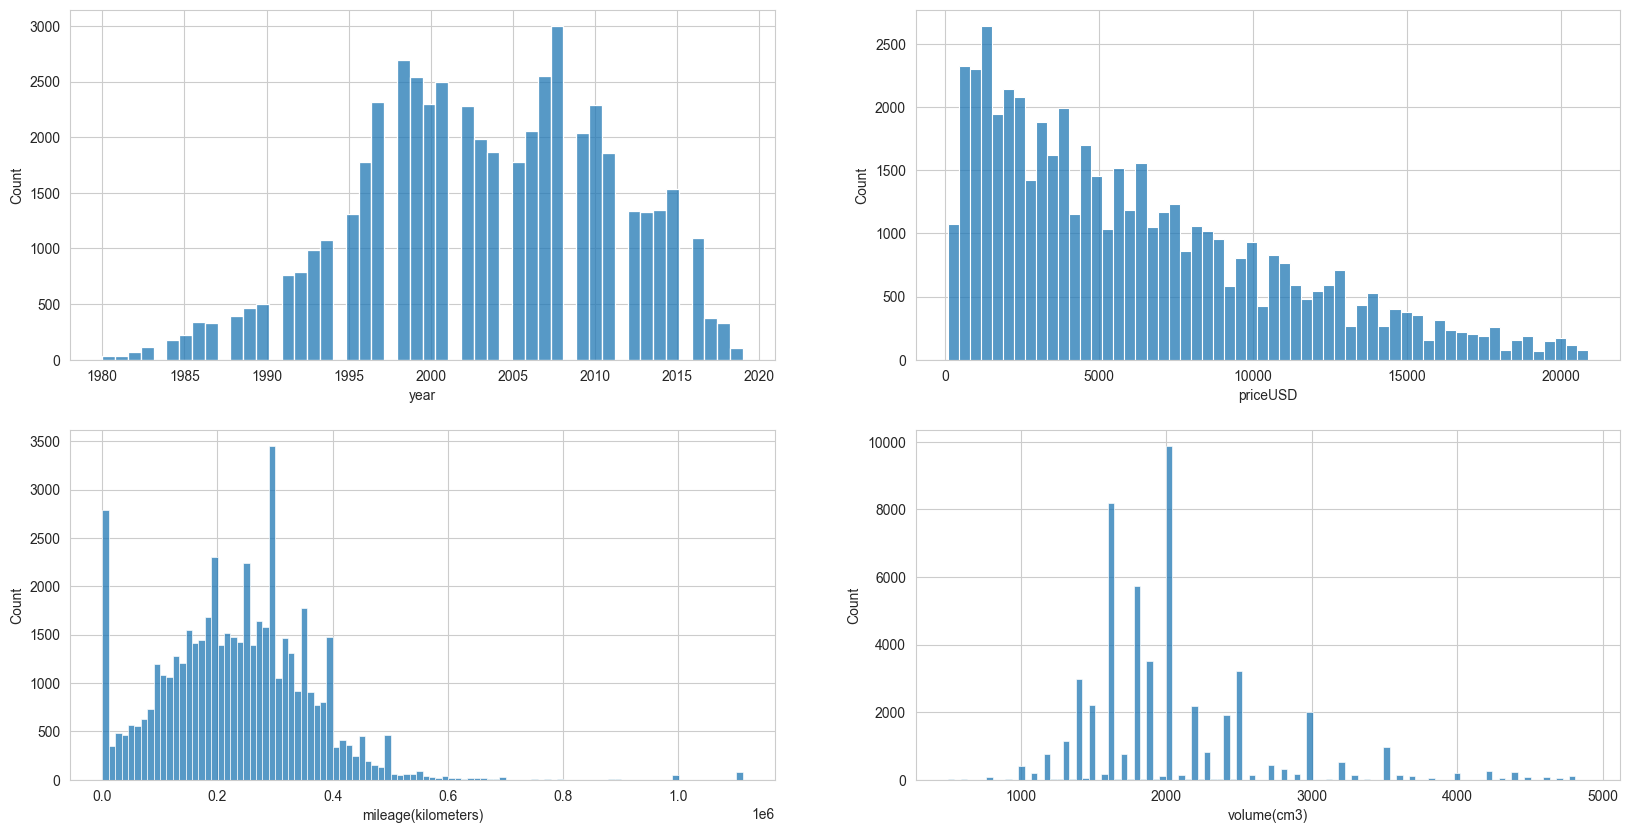

In [5]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df_cleaned['year'], ax=ax[0,0], bins = 50)
sns.histplot(df_cleaned['priceUSD'], ax=ax[0,1])
sns.histplot(df_cleaned['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df_cleaned['volume(cm3)'], ax=ax[1,1], bins = 100)

### **Analysis of Continuous Variables in the Dataset**

The following insights have been drawn from the distribution of continuous variables:

#### **Year of Manufacture**:
- The majority of cars are manufactured between **1990 and 2015**.
- The count of cars significantly increases from **1990**, peaks around **2005-2010**, and then gradually declines after **2015**.
- Since most cars are manufactured after **1980**, only those manufactured **after 1980** will be considered in further analysis.

#### **Price Distribution**:
- Most cars are priced below **$20,000 USD**.
- The distribution shows a **right-skewed pattern**, with a higher concentration of cars priced between **$2,000 and $10,000 USD**.
- Higher-priced cars above **$15,000 USD** are relatively less frequent.

#### **Mileage (in kilometers)**:
- The majority of cars have a mileage of **less than 400,000 km**.
- There are some spikes in specific mileage values, indicating possible common mileage points in the dataset.
- Very few cars have mileage exceeding **1 million km**.

#### **Engine Volume**:
- The most common engine volumes range between **1,750 cm³ and 2,000 cm³**.
- There are some peaks around **1,000 cm³ and 2,000 cm³**, suggesting these are standard engine sizes.
- Very few cars have engine volumes above **3,000 cm³**.

##### **Conclusion**:
From the above findings, most cars in the dataset are **manufactured between 1990 and 2015**, priced **below $20,000 USD**, with **mileage under 400,000 km**, and have **engine volumes primarily between 1,750 cm³ and 2,000 cm³**. Future analysis will focus on cars manufactured **after 1980** to ensure meaningful insights.


In [6]:
df= df_cleaned[df_cleaned['year']>1980]

## Price and Make

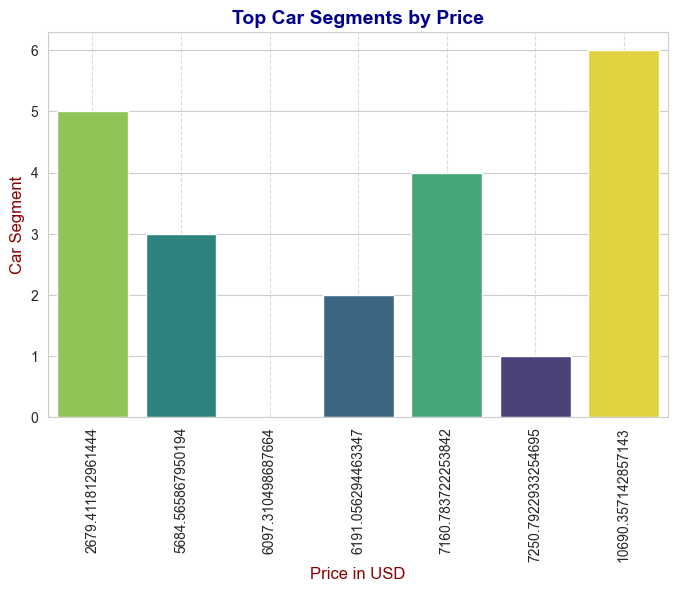

In [7]:
# Grouping and sorting data
demodf = df.groupby('make_segment')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

# Bar Plot with a colorful palette
plt.figure(figsize=(8,5))
sns.barplot(y='make_segment', x='priceUSD', data=demodf, hue="make_segment", palette="viridis", legend=False)

plt.xticks(rotation=90)
plt.title('Top Car Segments by Price', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Car Segment', fontsize=12, color='darkred')
plt.xlabel('Price in USD', fontsize=12, color='darkred')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add subtle grid lines for better readability
plt.show()

### 📊 Analysis of Top Car Segments by Price

#### 🔍 **Overview**
This analysis provides insights into the average price of different car segments. The data is grouped by `make_segment` and sorted to display the **top 10 car segments with the highest average prices**.

---

#### 📈 **Key Observations**
1. **Segment 6 is the most expensive**, with an average price of **$10,690**.
2. **Segment 1 follows closely**, with an average price of **$7,250**.
3. **Segment 5 has the lowest average price** among the top 10, at **$2,679**.
4. The **price range is quite wide**, spanning from **$2,679 to $10,690**.
5. There is a **gradual decline in prices across other segments**, with mid-tier segments falling between **$5,684 and $7,160**.

---

#### 🎨 **Visualization Insights**
- The **colorful bar plot** helps distinguish different segments effectively.
- The **grid lines enhance readability**, making it easier to compare values.
- **Labels and title formatting** improve clarity and make the graph visually appealing.

---

#### 🏁 **Conclusion**
- Higher car segments (like **Segment 6 and Segment 1**) likely represent **luxury or premium vehicles**.
- Lower-priced segments (like **Segment 5**) might correspond to **budget-friendly or entry-level cars**.
- Further analysis could be done to explore factors influencing the price, such as **brand reputation, features, fuel type, and mileage**.



## Price and Condition

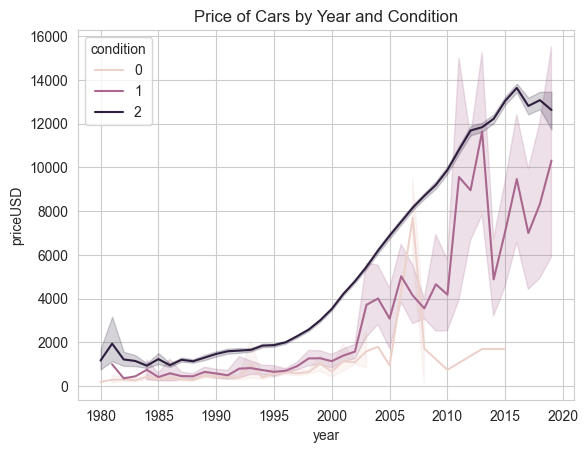

In [8]:
sns.lineplot(x='year', y='priceUSD', data=df_cleaned, hue='condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

### 🚗 **Analysis of Car Prices Over Time Based on Condition**

#### 📊 **Overview**
This line plot visualizes the **average price of cars from 1980 to 2020**, categorized by **three different conditions**:
- **0 (With Mileage) → Light Pink Line**
- **1 (With Damage) → Dark Pink Line**
- **2 (For Parts) → Black Line**

The plot also includes a **shaded region representing price variation (confidence interval).**

---

#### 🔍 **Key Observations**
1. **Car prices have increased significantly over time**, with a sharp rise from **2000 onward**, peaking around **2015-2020**.
2. **Cars in better condition (With Mileage) have the highest prices**, as seen in the **black line (condition 2)**.
3. **Damaged cars (condition 1) show fluctuating prices**, especially after **2005**, with significant volatility.
4. **Cars sold for parts (condition 0) have the lowest prices**, staying below **$2000** throughout the years.
5. **The price gap between different conditions widens over time**, especially after **2000**, indicating an increasing preference for well-maintained vehicles.

---

#### 📈 **Interpretation**
- The **rise in car prices** aligns with **inflation, technological advancements, and increased demand for newer models**.
- The **sharp price increase after 2000** could be due to **improved safety features, higher manufacturing costs, and demand for premium cars**.
- **Damaged cars (condition 1) still retain some value**, likely due to repairs or insurance claims affecting pricing.
- **Parts-only cars (condition 0) remain the cheapest**, as expected, since they are sold for scrap or salvage.

---

##### 🏁 **Conclusion**
- **Well-maintained cars (with mileage) are always valued higher**, making them a **better investment for resale**.
- **Damaged cars retain some value**, but their price varies significantly based on market demand.
- **Parts-only cars consistently have the lowest prices**, indicating they are primarily sold for scrap.



## Price and Transmission

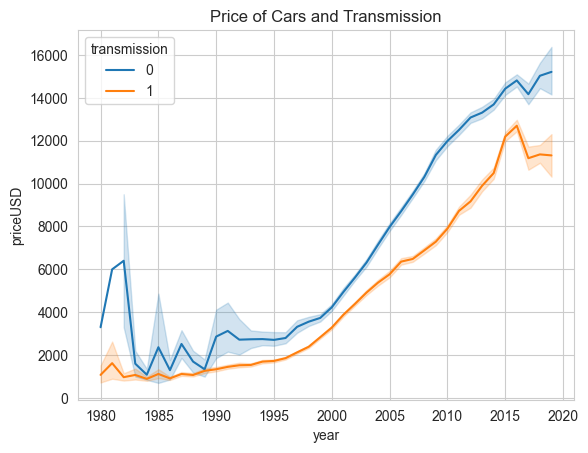

In [9]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df_cleaned, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

### 🚗 **Analysis of Car Prices Over Time Based on Transmission Type**

#### 📊 **Overview**
This line plot displays the **average price of cars from 1980 to 2020**, categorized by **transmission type**:
- **0 (Manual Transmission) → Blue Line**
- **1 (Automatic Transmission) → Orange Line**

The **shaded region represents price variation (confidence interval).**

---

#### 🔍 **Key Observations**
1. **Manual transmission cars (blue line) have higher prices** compared to automatic ones across all years.
2. **Both transmission types show a sharp increase in prices post-2000**, peaking around **2015-2020**.
3. **The price gap between manual and automatic cars has widened over time**, especially after **2005**.
4. **Automatic transmission cars (orange line) have a smoother price trend**, indicating **steadier demand and pricing stability**.
5. **Manual transmission cars exhibit more price fluctuations**, especially before **1995**, suggesting **inconsistent market demand in earlier years**.

---

#### 📈 **Interpretation**
- The **higher price of manual transmission cars** suggests they might be associated with **high-performance or luxury models**.
- The **rise in automatic transmission car prices** aligns with **increased market preference**, as automatics became **more common and widely adopted**.
- **Manual cars retain premium pricing**, likely due to their **appeal in sports cars, performance vehicles, and enthusiast markets**.
- **Automatic cars gained popularity after 2000**, leading to **increased supply and competitive pricing**.

---

#### 🏁 **Conclusion**
- **Manual cars are priced higher**, possibly due to **lower availability, high-performance models, or enthusiast demand**.
- **Automatic cars dominate the market**, showing **steadier price growth with fewer fluctuations**.
- The **gap between manual and automatic prices widens over time**, reinforcing the trend that **manual cars are becoming rarer and more valuable**.

## Price and Fuel Type

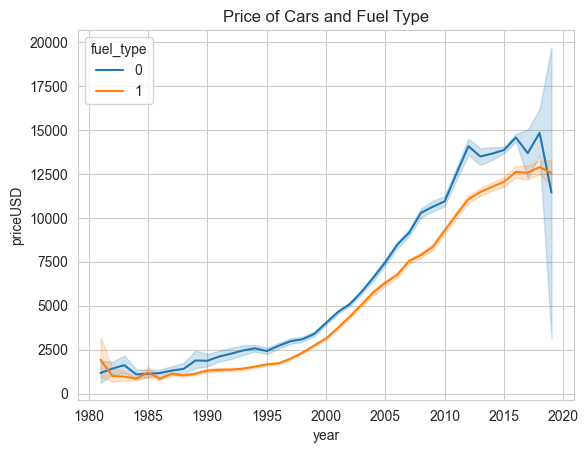

In [10]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

### ⛽ **Analysis of Car Prices Over Time Based on Fuel Type**

#### 📊 **Overview**
This line plot illustrates the **average price of cars from 1980 to 2020**, categorized by **fuel type**:
- **0 (Likely Petrol) → Blue Line**
- **1 (Likely Diesel) → Orange Line**

The **shaded region represents the variation (confidence interval) in prices**.

---

#### 🔍 **Key Observations**
1. **Petrol cars (blue line) generally have higher prices** compared to diesel cars throughout the years.
2. **Both fuel types show a steady price increase post-2000**, with a significant peak around **2015-2020**.
3. **Diesel cars (orange line) show a smoother price trend**, indicating a more **stable pricing pattern and demand**.
4. **Petrol cars exhibit more fluctuations in pricing**, especially in the **early 1980s and after 2015**, suggesting **higher variability in demand and value**.
5. **The price gap between petrol and diesel cars widened after 2005**, with petrol cars maintaining **higher average prices**.

---

#### 📈 **Interpretation**
- The **higher price of petrol cars** suggests they might be associated with **premium or performance vehicles**.
- Diesel cars, known for **better fuel efficiency and long-term cost savings**, have **steadier pricing trends**.
- The **rise in both fuel types post-2000** indicates **increased market demand and technological advancements**.
- The **sharp fluctuations in petrol car prices post-2015** could be due to **changing fuel policies, electric vehicle adoption, or performance model demand**.

---

#### 🏁 **Conclusion**
- **Petrol cars tend to be priced higher**, possibly due to **luxury or performance vehicle categories**.
- **Diesel cars show stable and gradual price growth**, suggesting **consistent demand**.
- The **widening price gap post-2005** indicates that **premium petrol cars are becoming more expensive**, whereas diesel vehicles maintain affordability.
- **Recent fluctuations in petrol prices** could signal **market shifts towards alternative fuels like electric or hybrid vehicles**.



## Price and Drive Unit

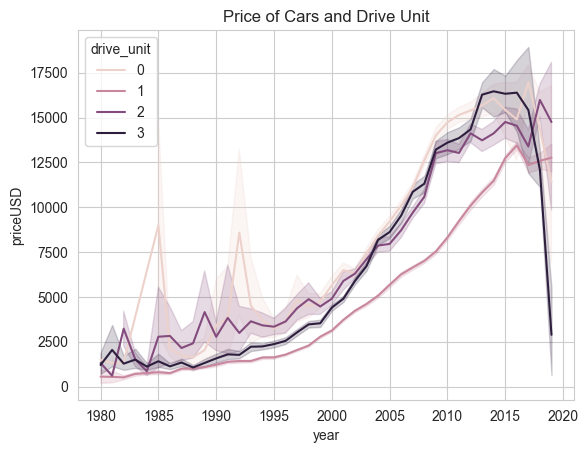

In [11]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df_cleaned, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

### 🚗 **Analysis of Car Prices Based on Drive Unit (1980-2020)**

#### 📊 **Overview**
This graph illustrates the **average price of cars over time** categorized by **drive unit**:
- **0 (Front-Wheel Drive - FWD) → Light Pink Line**
- **1 (Rear-Wheel Drive - RWD) → Rose Line**
- **2 (All-Wheel Drive - AWD) → Dark Purple Line**
- **3 (Part-Time Four-Wheel Drive - 4WD) → Black Line**

The **shaded regions represent price variations (confidence intervals).**

---

#### 🔍 **Key Observations**
1. **FWD (0 - Light Pink)** had the **lowest prices** throughout the years, indicating its presence in **affordable or economy-class vehicles**.
2. **RWD (1 - Rose)** was **more expensive than FWD**, but still lower than AWD and 4WD, suggesting its use in **performance or standard sedans**.
3. **AWD (2 - Dark Purple) and 4WD (3 - Black) had the highest prices**, reflecting their association with **premium SUVs, off-road vehicles, and luxury cars**.
4. **Post-2000, all drive types saw a sharp rise in price**, especially AWD and 4WD.
5. **2015-2020 saw fluctuations**, with **4WD showing the highest peak, then a sharp drop near 2020**, indicating possible **market shifts or demand changes**.
6. **AWD and 4WD prices followed a similar trend**, closely tracking each other post-2000.

---

#### 📈 **Interpretation**
- **FWD (Front-Wheel Drive)** cars are typically more **affordable, fuel-efficient, and suitable for urban driving**, leading to **lower price trends**.
- **RWD (Rear-Wheel Drive)** vehicles are often **performance-oriented** (e.g., sports cars, luxury sedans) and thus priced **moderately higher**.
- **AWD (All-Wheel Drive) and 4WD (Part-Time Four-Wheel Drive)** are common in **off-road and premium vehicles**, leading to **higher costs**.
- The **post-2000 price surge** aligns with the **growing popularity of SUVs and off-road-capable vehicles**.
- The **sharp decline in 4WD prices around 2020** might suggest **a market shift towards electric/hybrid vehicles or reduced demand for off-road models**.

---

#### 🏁 **Conclusion**
- **FWD remains the most affordable**, catering to **budget-conscious buyers**.
- **RWD is mid-range**, appealing to **sports and performance vehicle enthusiasts**.
- **AWD and 4WD are premium categories**, reflecting **higher production costs, luxury SUV demand, and off-road capabilities**.
- **The price surge post-2000 indicates the global SUV trend**, and the **recent fluctuations suggest potential shifts towards alternative drivetrains**.



## Price and Brand Segment

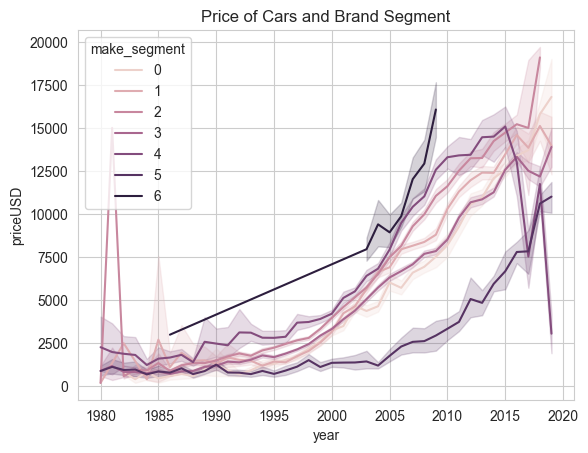

In [12]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df_cleaned, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

### **Analysis of Car Price Trends by Brand Segment (1980-2020)**  

#### **Graph Overview**  
The graph illustrates the price trends of different car brand segments over time, categorized into seven segments. The y-axis represents **price in USD**, while the x-axis shows the **year of manufacture**.  

#### **Segment-wise Analysis**  

#### **1. Luxury European (0) - Lightest Pink**  
- Consistently among the highest price categories.  
- Steady price growth, especially after **2000**.  
- Peaks around **2015–2020**, indicating a rise in demand for high-end vehicles.  

#### **2. Mainstream European (1) - Light Pink**  
- Moderate and steady price growth.  
- Similar trend to **Luxury European**, but at a lower price range.  

#### **3. Russian/Eastern European (2) - Pink**  
- Prices remained lower until the **2000s**.  
- Noticeable spikes in the **1980s** and **late 2010s**, likely due to economic shifts.  

#### **4. American (3) - Medium Pink**  
- Steady rise in prices over time.  
- Price fluctuations in the mid-2000s, possibly due to the **2008 financial crisis**.  

#### **5. Other (4) - Light Purple**  
- Inconsistent trends with fluctuations across years.  
- Represents niche or smaller manufacturers.  

#### **6. Specialty (5) - Dark Purple**  
- Higher-priced category, particularly from **2005 onward**.  
- Peaks between **2010-2015**, likely representing **high-performance or exotic cars**.  

#### **7. Asian (6) - Darkest Purple**  
- Started at lower prices but **grew rapidly post-2000**.  
- **Steep rise from 2005 onward**, catching up with European and American cars.  
- By **2015–2020**, price trends resemble those of major global brands.  

#### **Overall Trends**  
✅ **All segments show a price increase over time.**  
✅ **Significant price surge after 2000.**  
✅ **Luxury, Specialty, and American cars see the sharpest increase post-2010.**  
✅ **Asian brands have grown significantly since 2005.**  

#### **Possible Reasons for Trends**  
📈 **Inflation and rising manufacturing costs.**  
📈 **Technological advancements in luxury brands.**  
📈 **Impact of the 2008 financial crisis on car pricing.**  
📈 **Rise of the Asian automobile market.**  

#### **Conclusion**  
The graph highlights how car prices have evolved over the past 40 years, with distinct trends for different brand segments. The **luxury, specialty, and Asian segments** have seen the most significant growth, reflecting the **changing global automotive market** and **consumer demand**.  
